In [1]:
import random
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
x = [round( 1 + random.random(), 3 ) for _ in range(0, 100)]

In [3]:
y = list( map( lambda x: round( math.sin(6*x), 3 ), x ) )

In [4]:
noise = [round( random.random()/2, 3 ) for _ in range(0, 100)]

In [5]:
y_rand = list( map( lambda a, b: round( a + b, 3 ), y, noise ) )

In [6]:
xy_df = pd.DataFrame( { 'x': x, 'y':y_rand } )
xy = xy_df.copy()

In [7]:
xy.head(5)

,x,y
0,1.989,-0.454
1,1.651,-0.281
2,1.480,0.789
3,1.796,-0.783
4,1.344,1.182


c:\users\aman sharif\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\aman sharif\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


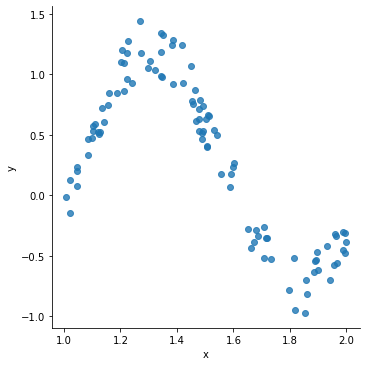

In [8]:
sn.lmplot( "x", "y", data=xy, fit_reg=False, size = 5 )

In [9]:
for i in range( 2, 20 ):
  xy_df[ 'x'+ str( i ) ] = xy_df.x.map( lambda a: math.pow( a, i ) )

In [10]:
xy_df.columns

Index(['x', 'y', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19'],
      dtype='object')

In [11]:
xy_df = xy_df[['x', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
             'x8', 'x9', 'x10', 'x11','x12', 'x13', 'x14',
             'x15', 'x16', 'x17', 'x18', 'x19', 'y']]
xy_df.head(5)

,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,1.989,3.956121,7.868725,15.650893,31.129627,61.916828,123.152571,244.950463,487.206471,969.053671,1927.447752,3833.693579,7625.216529,15166.555676,30166.279240,60000.729409,119341.450795,237370.145631,472129.219660,-0.454
1,1.651,2.725801,4.500297,7.429991,12.266915,20.252677,33.437170,55.204768,91.143071,150.477211,248.437875,410.170932,677.192208,1118.044336,1845.891198,3047.566368,5031.532074,8307.059454,13714.955158,-0.281
2,1.480,2.190400,3.241792,4.797852,7.100821,10.509215,15.553639,23.019385,34.068690,50.421662,74.624059,110.443608,163.456539,241.915678,358.035204,529.892102,784.240311,1160.675660,1717.799977,0.789
3,1.796,3.225616,5.793206,10.404599,18.686659,33.561240,60.275986,108.255672,194.427186,349.191226,627.147443,1126.356807,2022.936825,3633.194538,6525.217391,11719.290433,21047.845619,37801.930731,67892.267593,-0.783
4,1.344,1.806336,2.427716,3.262850,4.385270,5.893803,7.921271,10.646188,14.308477,19.230593,25.845918,34.736913,46.686411,62.746537,84.331346,113.341329,152.330746,204.732522,275.160510,1.182


In [12]:
from sklearn.linear_model import LinearRegression

def get_lm( curve, deg = 1 ):

  lreg = LinearRegression()
  lreg.fit( curve.iloc[:,:deg], curve.y )

  lreg_predict_y = lreg.predict( curve.iloc[:,:deg] )

  plt.plot( curve.x, curve.y, 'k.')
  plt.plot( curve.x, lreg_predict_y, 'g-', label='degree ' + str(deg) + 'fit' )
  plt.legend(loc='upper right')

  return lreg

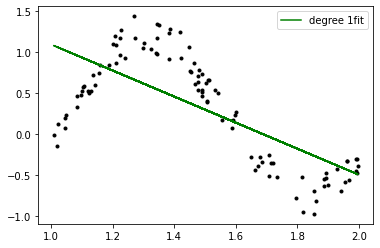

In [13]:
lreg_1 = get_lm( xy_df, 1)

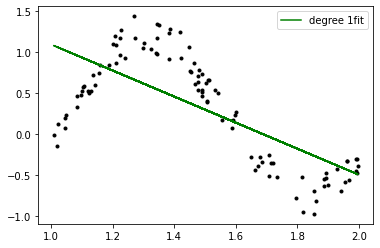

In [14]:
lreg_1 = get_lm( xy_df, 1)

array([ 8.53803106, -3.34415687])

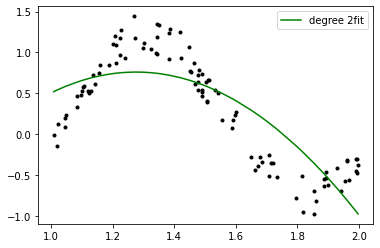

In [15]:
xy_df = xy_df.sort_values( ['x'], ascending = True )

lreg_2 = get_lm( xy_df, 2)
lreg_2.coef_

array([130.21625481, -85.93409572,  18.24303794])

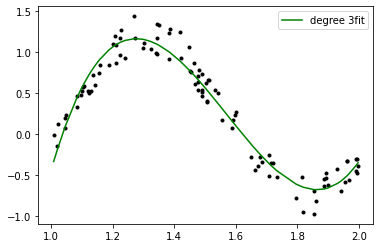

In [16]:

lreg_3 = get_lm( xy_df, 3 )
lreg_3.coef_

array([  1.99752199,  45.99627504, -41.10250155,   9.85240833])

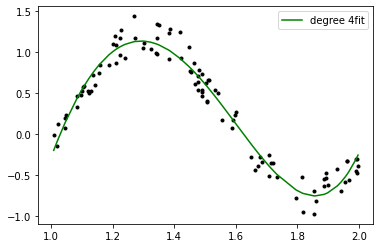

In [17]:

lreg_4 = get_lm( xy_df, 4 )
lreg_4.coef_

array([-2.01123563e+06,  6.41210689e+06, -1.20265700e+07,  1.46947558e+07,
       -1.22212273e+07,  7.00630407e+06, -2.73402175e+06,  6.95031324e+05,
       -1.03948378e+05,  6.94609302e+03])

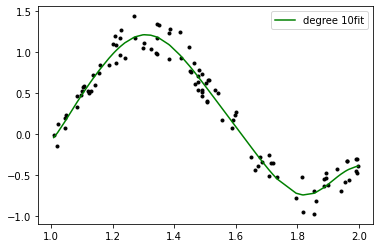

In [18]:
lreg_10 = get_lm( xy_df, 10 )
lreg_10.coef_

11110340.501958594

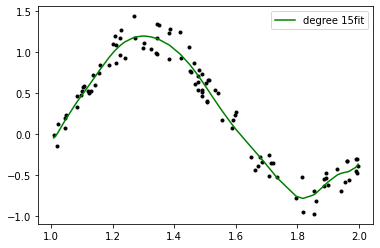

In [19]:
lreg_15 = get_lm( xy_df, 15 )
lreg_15.intercept_

In [21]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( xy_df.iloc[:,:-1],
                                                   xy_df.y,
                                                   test_size = 0.40,
                                                   random_state = 100 )

In [22]:
train_X.iloc[:,:19].head( 5 )

,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
57,1.715,2.941225,5.044201,8.650805,14.836130,25.443962,43.636396,74.836419,128.344458,220.110745,377.489928,647.395226,1110.282813,1904.135024,3265.591566,5600.489535,9604.839553,16472.299833,28249.994213
14,1.709,2.920681,4.991444,8.530378,14.578415,24.914511,42.578900,72.767340,124.359385,212.530188,363.214092,620.732883,1060.832497,1812.962738,3098.353319,5295.085823,9049.301671,15465.256555,26430.123453
77,1.508,2.274064,3.429289,5.171367,7.798422,11.760020,17.734110,26.743037,40.328500,60.815379,91.709591,138.298063,208.553479,314.498647,474.263960,715.190051,1078.506597,1626.387949,2452.593027
10,1.421,2.019241,2.869341,4.077334,5.793892,8.233120,11.699264,16.624654,23.623634,33.569184,47.701810,67.784272,96.321450,136.872781,194.496222,276.379131,392.734745,558.076073,793.026099
91,1.720,2.958400,5.088448,8.752131,15.053665,25.892303,44.534761,76.599789,131.751638,226.612817,389.774045,670.411357,1153.107534,1983.344959,3411.353330,5867.527727,10092.147690,17358.494027,29856.609726


In [23]:
lreg = LinearRegression

In [24]:
def get_detail_df():

  all_reg_df = pd.DataFrame( {'deg': [],
                              'intercept': [],
                              'x1':[], 'x2':[], 'x3':[], 'x4':[], 'x5':[],
                              'x6':[], 'x7':[], 'x8':[], 'x9':[], 'x10':[],
                              'x11':[], 'x12':[], 'x13':[], 'x14':[], 'x15':[],
                              'x16':[], 'x17':[], 'x18':[], 'x19':[], 'x20':[],
                              'train_rmse':[],
                              'test_rmse':[],
                              'train_r2':[],
                              'test_r2':[] } )

  all_reg_df.columns = ['deg', 'intercept',
         'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
         'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
         'train_rmse', 'test_rmse', 'train_r2', 'test_r2' ]

  return all_reg_df

In [25]:
len( get_detail_df().columns )

26

In [26]:
def get_lm_details( trainX, trainY, testX, testY, reg_df, deg = 1 ):

  lreg = LinearRegression()
  lreg.fit( trainX.iloc[:,:deg], trainY )

  predict_y_train = lreg.predict( trainX.iloc[:,:deg] )
  predict_y_test = lreg.predict( testX.iloc[:,:deg] )

  lm_series =  ( [deg] +
      [lreg.intercept_] +
      list(lreg.coef_) +
      [np.nan for i in range( 1, 21 - deg )] +
      [ np.sqrt( metrics.mean_squared_error( trainY, predict_y_train ) ),
      np.sqrt( metrics.mean_squared_error( testY, predict_y_test ) ),
      metrics.r2_score( trainY, predict_y_train ),
      metrics.r2_score( testY, predict_y_test ) ] )

#    reg_df = reg_df.append( pd.DataFrame( lm_series).T )
  reg_df = reg_df.append( pd.Series( lm_series, index = reg_df.columns ),  ignore_index = True )

  return lm_series, reg_df

In [27]:
all_df = get_detail_df()

for i in range( 1, 20 ):
  lm_series, all_df = get_lm_details( train_X, train_y, test_X, test_y, all_df, i )

In [28]:

all_df

,deg,intercept,x1,x2,x3,x4,x5,x6,x7,x8,...,x15,x16,x17,x18,x19,x20,train_rmse,test_rmse,train_r2,test_r2
0,1.0,2.203208e+00,-1.290694e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.420995,0.527488,0.457334,0.512953
1,2.0,-4.630760e+00,8.123336e+00,-3.114114e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.323189,0.451087,0.680190,0.643824
2,3.0,-5.618829e+01,1.159277e+02,-7.623770e+01,1.611443e+01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.134384,0.185451,0.944706,0.939799
3,4.0,-1.041360e+00,-3.825208e+01,8.264033e+01,-5.544220e+01,1.189103e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.119223,0.186144,0.956479,0.939348
4,5.0,1.834317e+02,-6.893934e+02,9.889042e+02,-6.771916e+02,2.222145e+02,-2.807773e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.114168,0.168060,0.960091,0.950561
5,6.0,9.598718e+01,-3.206793e+02,3.485929e+02,-9.089668e+01,-7.638989e+01,5.215304e+01,-8.887761e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.114136,0.168610,0.960114,0.950237
6,7.0,3.347152e+03,-1.632033e+04,3.377047e+04,-3.850899e+04,2.617188e+04,-1.060877e+04,2.374963e+03,-2.264365e+02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.113092,0.168524,0.960840,0.950287
7,8.0,-2.063627e+04,1.181724e+05,-2.935265e+05,4.129839e+05,-3.600014e+05,1.991330e+05,-6.827585e+04,1.327024e+04,-1.119701e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,0.111215,0.167302,0.962129,0.951006
8,9.0,5.633552e+04,-3.683973e+05,1.063688e+06,-1.779569e+06,1.900822e+06,-1.344056e+06,6.290626e+05,-1.879114e+05,3.250865e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,0.110705,0.170320,0.962476,0.949222
9,10.0,1.244575e+06,-8.730722e+06,2.737839e+07,-5.054018e+07,6.082110e+07,-4.985929e+07,2.819850e+07,-1.086491e+07,2.729638e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,0.107057,0.178303,0.964908,0.944351


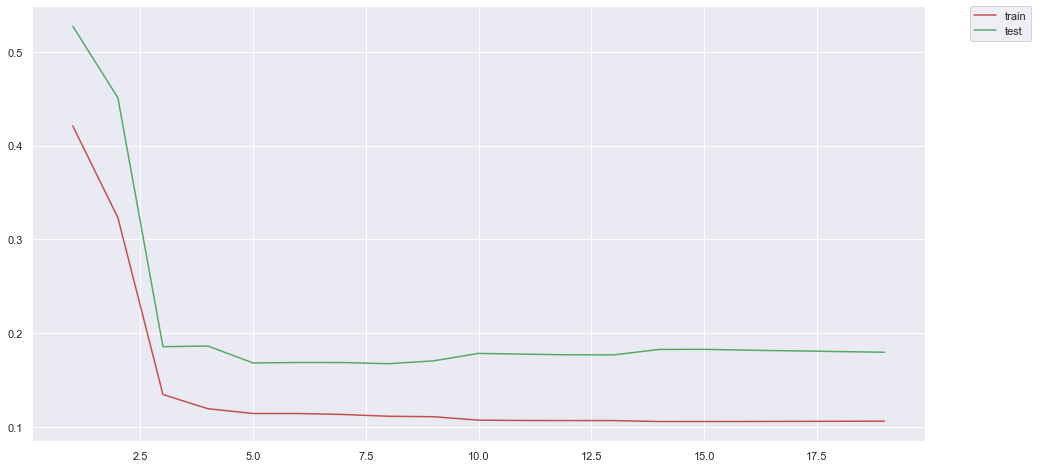

In [29]:
sn.set(rc={"figure.figsize": (16, 8)});

plt.plot( all_df.deg,
       all_df.train_rmse,
       label='train',
       color = 'r' )

plt.plot( all_df.deg,
       all_df.test_rmse,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
         loc=2,
         borderaxespad=0.)

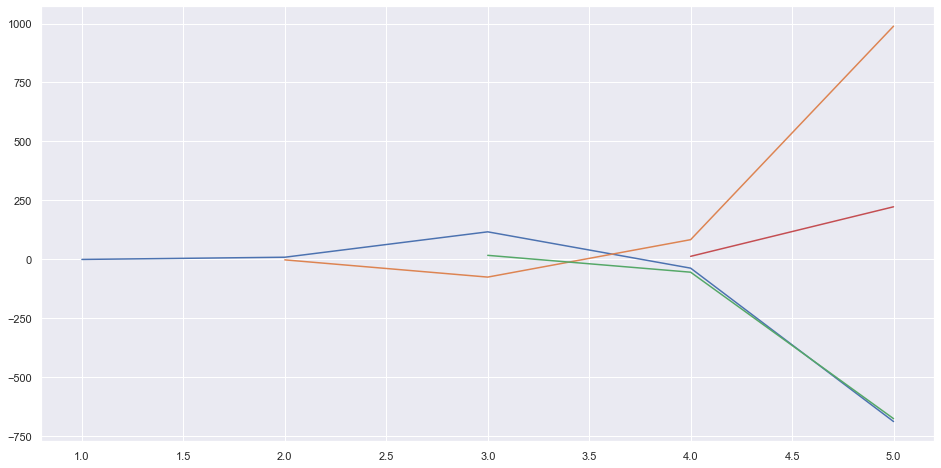

In [30]:
sn.set(rc={"figure.figsize": (16, 8)});

for i in range(1,5):
  column_name = 'x' + str(i)
  plt.plot( list(range(1,6)),
       all_df[column_name][0:5],
       label='coefficients')

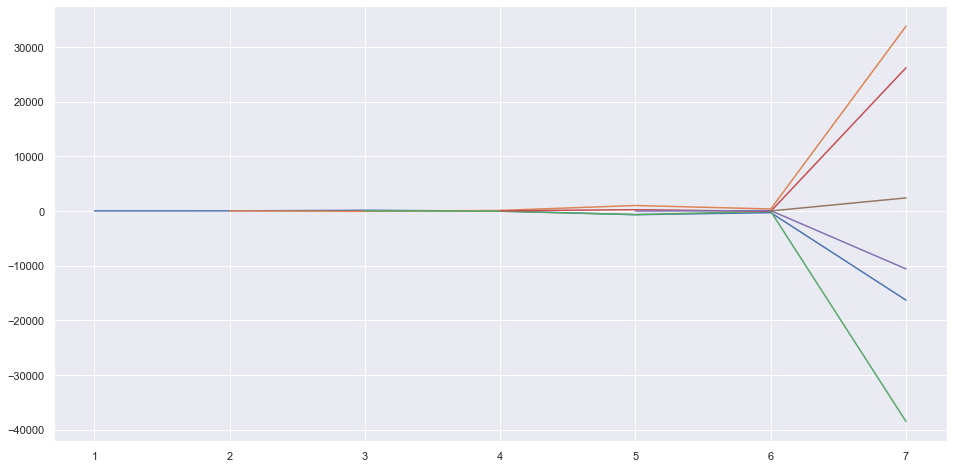

In [31]:
for i in range(1,7):
  column_name = 'x' + str(i)
  plt.plot( list(range(1,8)),
       all_df[column_name][0:7],
       label='coefficients')